In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [83]:
# Save as Dataframe the train file and keep only Store, Dept, Sales and use Date as Index
train_file = 'data/train.csv'

train_df = pd.read_csv(train_file)
train_df['Date'] = [datetime.strptime(date, '%Y-%m-%d').date() for date in train_df['Date'].astype(str).values.tolist()]
train_df.index = train_df['Date']
train_df = train_df.drop(['Date', 'IsHoliday'], axis=1)

print(train_df.head())

            Store  Dept  Weekly_Sales
Date                                 
2010-02-05      1     1      24924.50
2010-02-12      1     1      46039.49
2010-02-19      1     1      41595.55
2010-02-26      1     1      19403.54
2010-03-05      1     1      21827.90


In [84]:
# Define a function to plot sales evolution depending of the store and department number
def sales_evolution(store_number, dept_number):
    example_store_dept_sales = train_df[(train_df.Store == store_number) & (train_df.Dept == dept_number)]['Weekly_Sales']
    plt.figure(figsize=(10,4))
    example_store_dept_sales.plot(title='Store {} Dpt {} Sales evolution'.format(store_number, dept_number), color='blue') 
    return plt.show()

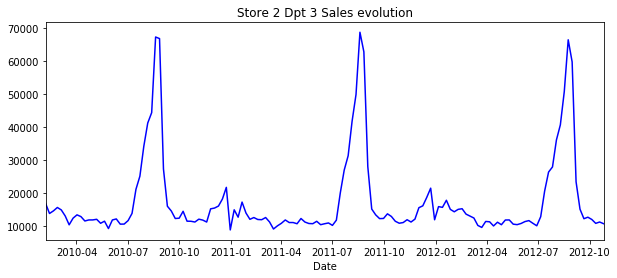

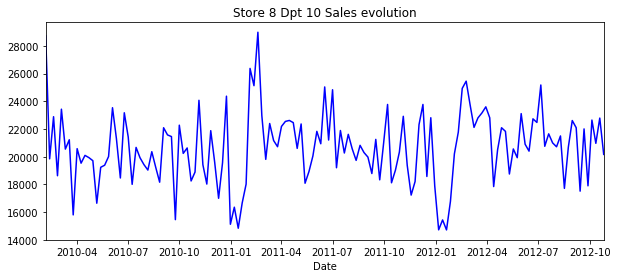

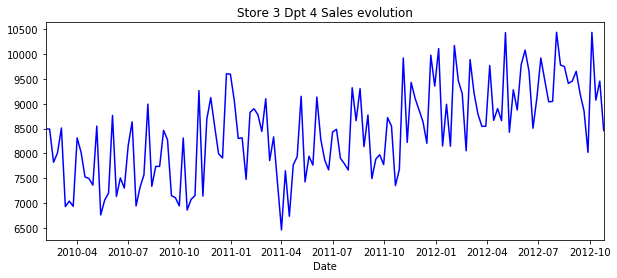

In [86]:
# Plot some examples
sales_evolution(2,3)
sales_evolution(8,10)
sales_evolution(3,4)

In [87]:
def make_time_series(train_df, years, freq='W-FRI'):
    '''Creates as many time series as there are store x department x complete years. 
      :param train_df: Our dataframe with train data. One value for each store, department, week
          This dataframe should also be indexed by a datetime.
      :param years: A list of years to make time series out of, ex. ['2010', '2011'].
      :param freq: The frequency of data recording (W-FRI = Weekly, starting on Friday)
      :return: A list of pd.Series(), time series data.
      '''
    
    # store time series
    time_series = []
    
    # create time series for each store and each department
    for store in train_df.Store.unique().tolist():
        for dept in train_df.Dept.unique().tolist():
            
            sample_df = train_df[(train_df.Store == store) & (train_df.Dept == dept)]['Weekly_Sales']
            start_idx = 0
            # create time series for each year in years
            for i in range(len(years)):

                year = years[i]
                end_idx = start_idx+52

                # create start and end datetimes
                t_start = year + '-02-05' # start with first date 
                t_end = str(int(year)+1) + '-02-04' # end one year later

                # get wanted sample_df data
                data = sample_df[start_idx:end_idx]

                # create time series for the year
                index = pd.date_range(start=t_start, end=t_end, freq=freq)
                time_series.append(pd.Series(data=data, index=index))
        
                start_idx = end_idx
    
    # return list of time series
    return time_series

In [79]:
# Create yearly time series for our 2 complete years
full_years = ['2010', '2011']
freq='W-FRI' # weekly recordings

# make time series
time_series = make_time_series(train_df, full_years, freq=freq)

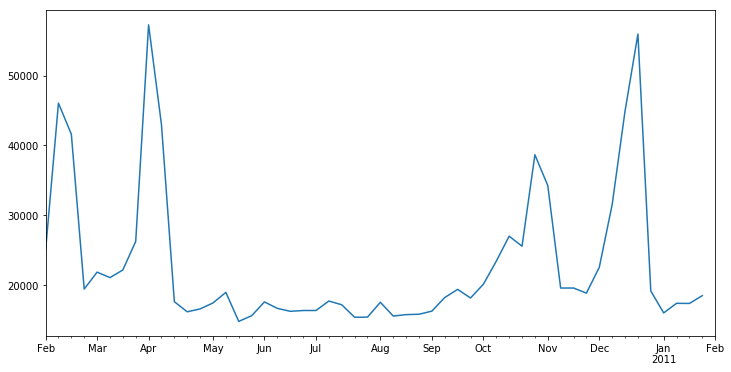

In [88]:
# display first time series
time_series_idx = 0

plt.figure(figsize=(12,6))
time_series[time_series_idx].plot()
plt.show()